# Post Earnings Event Study

* Explain the CAMP residual returns model
 - Expain earnings yield model to calculate surprises
* Re-do graph split by sector (check sales deck for graphs)
* Re-do graph by market cap (talk to Jess Stauth)
* Add chart graph by year and table for portfolio returns
* bucket in terms of a normal distribution

In [1]:
# Imports

import logging.config
import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)
    
from estimize.use_cases import PostEarningsEventStudy

import matplotlib.pyplot as plt


# Configure logging

logging.config.dictConfig({
    'version': 1,
    'disable_existing_loggers': False,
    'formatters': {
        'standard': {
            'format': '%(asctime)s [%(levelname)s] %(name)s: %(message)s'
        },
    },
    'handlers': {
        'default': {
            'level':'INFO',
            'class':'logging.StreamHandler',
            'stream'  : 'ext://sys.stdout',
            'formatter' : 'standard'
        },
    },
    'loggers': {
        '': {
            'handlers': ['default'],
            'level': 'INFO',
            'propagate': True
        }
    }
})

In [19]:
def plot_results(df):
    """
    Plots cumulative residual returns based on decile.
    
    Parameters
    ----------
    results : pd.DataFrame
    """
    df = df.reset_index()
    df.set_index('event_time', inplace=True)
    
    colors = ['black', 'blue', 'aqua', 'green', 'lime', 'yellow', 'orange', 'coral', 'pink', 'red']
    
    plt.figure(figsize=(16, 10))
    
    deciles = list(df['decile'].unique())
    deciles.reverse()
    
    for decile in deciles:
        color = colors[decile - 1]
        ddf = df.loc[df['decile'] == decile, 'cumulative_residual_return']
        ddf -= ddf.iloc[0]
        ddf *= 100.0
        ddf.plot(label=decile)
    
    plt.ylabel("% Cumulative Residual Return")
    plt.xlabel("Event Time")
    plt.gca().grid(True)
    plt.legend(title='Quintile', loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()

In [17]:
# Run all-time event study

start_date = '2012-01-01'
end_date = '2017-10-01'

es = PostEarningsEventStudy(
    start_date=start_date,
    end_date=end_date,
    days_before=10,
    days_after=5
)

df = es.results

print('num events: {}'.format(len(es.events)))

2017-12-07 17:11:02,082 [INFO] estimize.services.estimize_consensus_service: get_final_earnings_yields: start
2017-12-07 17:11:02,147 [INFO] estimize.services.estimize_consensus_service: get_final_earnings_yields: end
2017-12-07 17:11:31,682 [INFO] estimize.services.residual_returns_service: market_neutral_residual_returns: start
2017-12-07 17:11:32,500 [INFO] estimize.services.residual_returns_service: market_neutral_residual_returns: end
num events: 15891


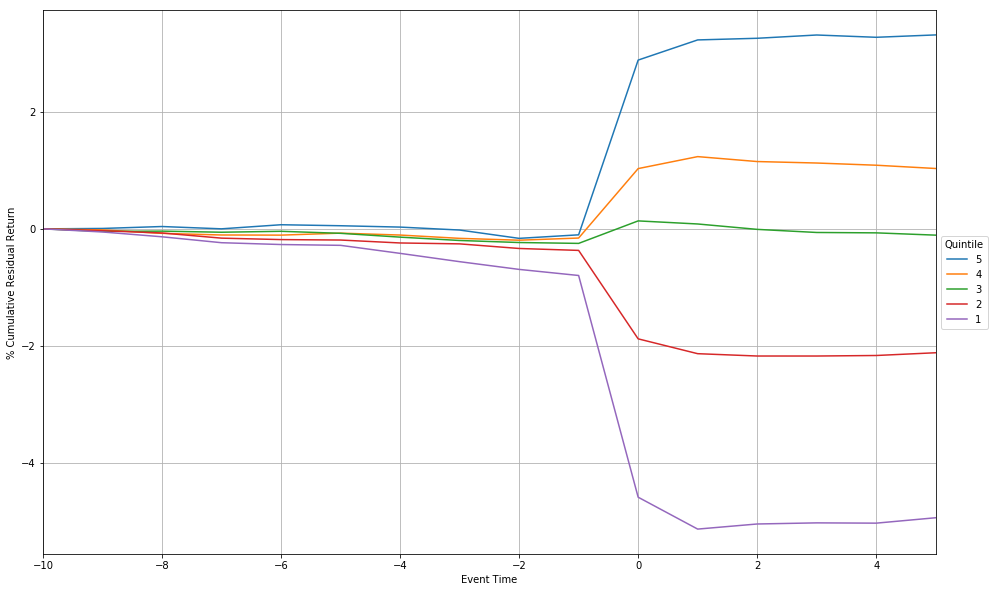

In [20]:
plot_results(df)

In [12]:
# Run 2017 event study

start_date = '2017-01-01'
end_date = '2017-10-01'

es2017 = PostEarningsEventStudy(
    start_date=start_date,
    end_date=end_date,
    days_before=10,
    days_after=5
)

df2017 = es2017.results

print('num events: {}'.format(len(es2017.events)))

2017-12-07 17:07:53,084 [INFO] estimize.services.estimize_consensus_service: get_final_earnings_yields: start
2017-12-07 17:07:53,142 [INFO] estimize.services.estimize_consensus_service: get_final_earnings_yields: end
2017-12-07 17:07:59,932 [INFO] estimize.services.residual_returns_service: market_neutral_residual_returns: start
2017-12-07 17:08:00,144 [INFO] estimize.services.residual_returns_service: market_neutral_residual_returns: end
num events: 3990


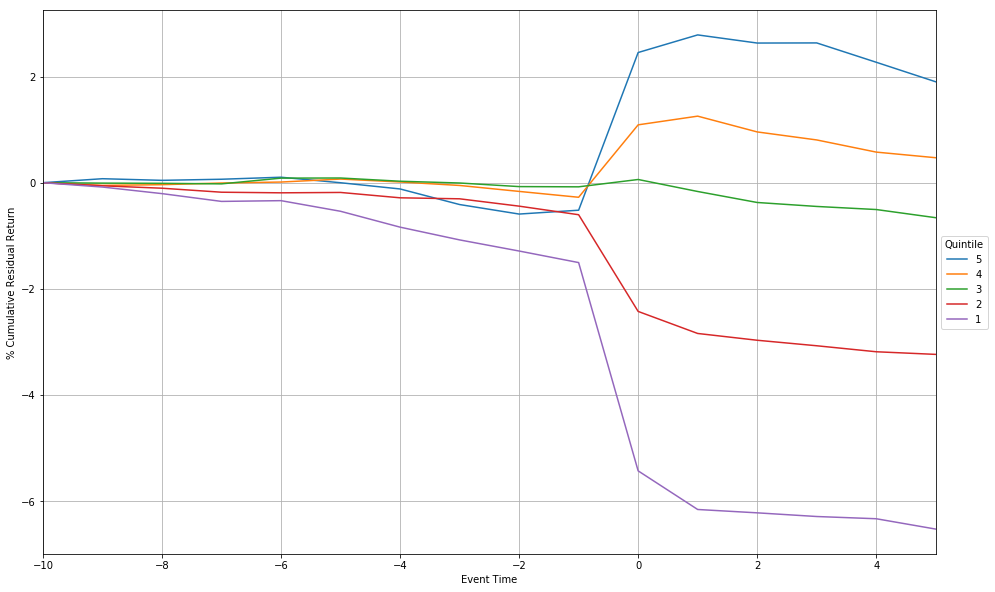

In [21]:
plot_results(df2017)

In [22]:
# Run 2016 event study

start_date = '2016-01-01'
end_date = '2017-01-01'

es2016 = PostEarningsEventStudy(
    start_date=start_date,
    end_date=end_date,
    days_before=10,
    days_after=5
)

df2016 = es2016.results

print('num events: {}'.format(len(es2016.events)))

2017-12-07 17:13:04,232 [INFO] estimize.services.estimize_consensus_service: get_final_earnings_yields: start
2017-12-07 17:13:04,289 [INFO] estimize.services.estimize_consensus_service: get_final_earnings_yields: end
2017-12-07 17:13:12,057 [INFO] estimize.services.residual_returns_service: market_neutral_residual_returns: start
2017-12-07 17:13:12,323 [INFO] estimize.services.residual_returns_service: market_neutral_residual_returns: end
num events: 5065


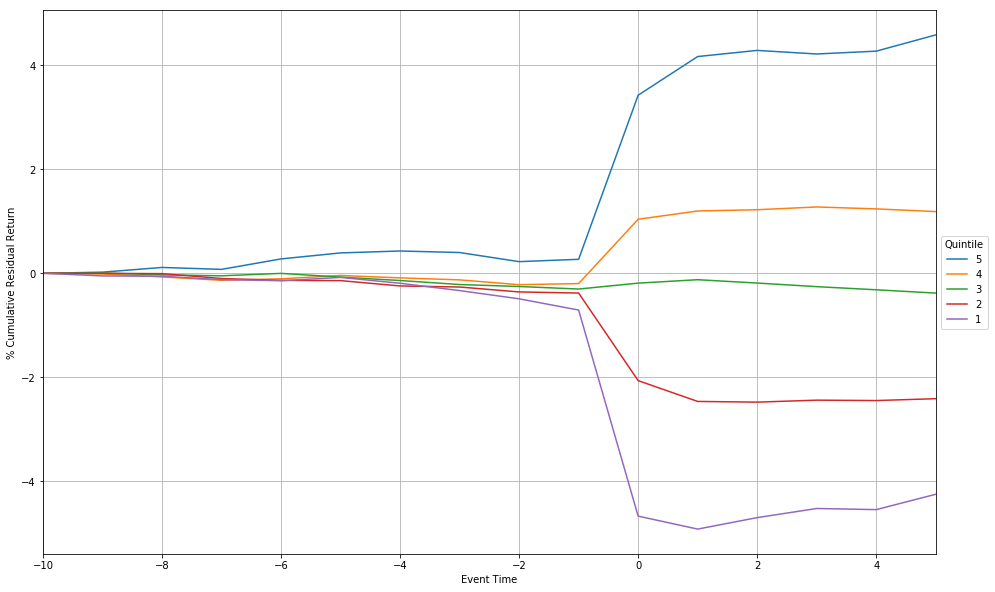

In [23]:
plot_results(df2016)

In [24]:
# Run 2015 event study

start_date = '2015-01-01'
end_date = '2016-01-01'

es2015 = PostEarningsEventStudy(
    start_date=start_date,
    end_date=end_date,
    days_before=10,
    days_after=5
)

df2015 = es2015.results

print('num events: {}'.format(len(es2015.events)))

2017-12-07 17:13:37,440 [INFO] estimize.services.estimize_consensus_service: get_final_earnings_yields: start
2017-12-07 17:13:37,497 [INFO] estimize.services.estimize_consensus_service: get_final_earnings_yields: end
2017-12-07 17:13:43,256 [INFO] estimize.services.residual_returns_service: market_neutral_residual_returns: start
2017-12-07 17:13:43,494 [INFO] estimize.services.residual_returns_service: market_neutral_residual_returns: end
num events: 3399


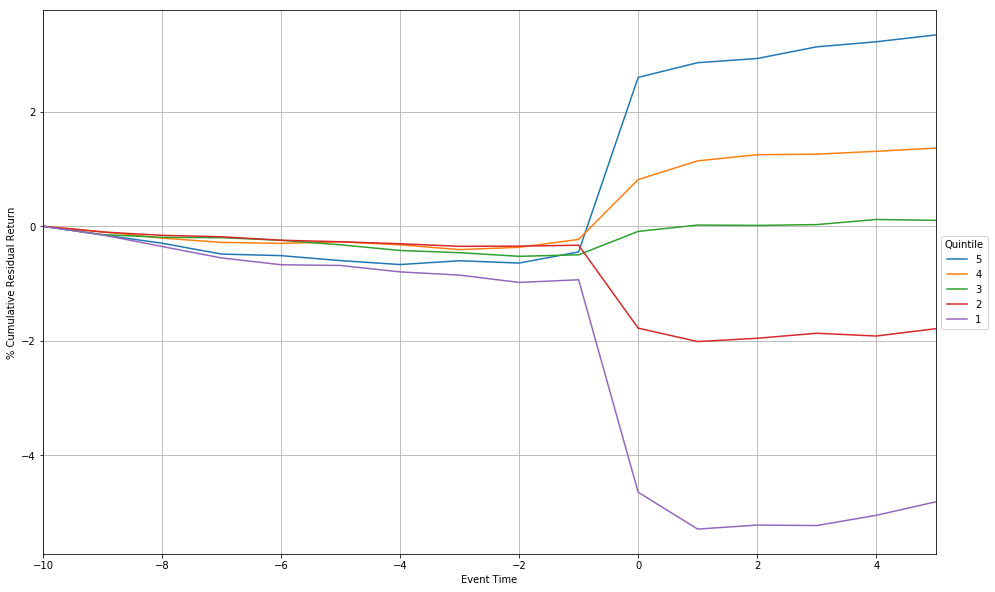

In [25]:
plot_results(df2015)

In [26]:
# Run 2014 event study

start_date = '2014-01-01'
end_date = '2015-01-01'

es2014 = PostEarningsEventStudy(
    start_date=start_date,
    end_date=end_date,
    days_before=10,
    days_after=5
)

df2014 = es2014.results

print('num events: {}'.format(len(es2014.events)))

2017-12-07 17:14:41,367 [INFO] estimize.services.estimize_consensus_service: get_final_earnings_yields: start
2017-12-07 17:14:41,428 [INFO] estimize.services.estimize_consensus_service: get_final_earnings_yields: end
2017-12-07 17:14:45,520 [INFO] estimize.services.residual_returns_service: market_neutral_residual_returns: start
2017-12-07 17:14:45,768 [INFO] estimize.services.residual_returns_service: market_neutral_residual_returns: end
num events: 2266


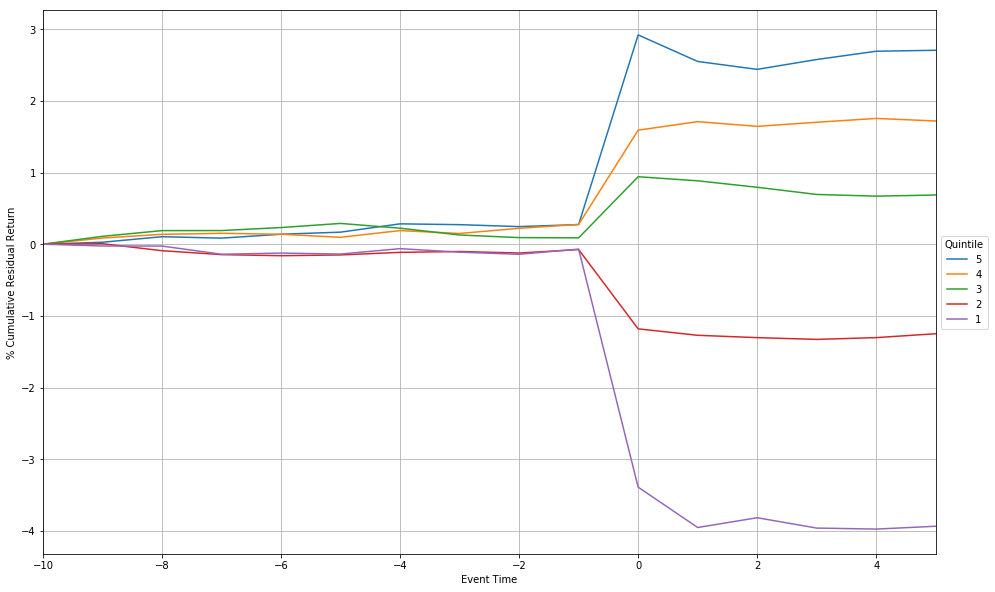

In [27]:
plot_results(df2014)

In [28]:
# Run 2013 event study

start_date = '2013-01-01'
end_date = '2014-01-01'

es2013 = PostEarningsEventStudy(
    start_date=start_date,
    end_date=end_date,
    days_before=10,
    days_after=5
)

df2013 = es2013.results

print('num events: {}'.format(len(es2013.events)))

2017-12-07 17:15:13,608 [INFO] estimize.services.estimize_consensus_service: get_final_earnings_yields: start
2017-12-07 17:15:13,673 [INFO] estimize.services.estimize_consensus_service: get_final_earnings_yields: end
2017-12-07 17:15:15,436 [INFO] estimize.services.residual_returns_service: market_neutral_residual_returns: start
2017-12-07 17:15:15,712 [INFO] estimize.services.residual_returns_service: market_neutral_residual_returns: end
num events: 1037


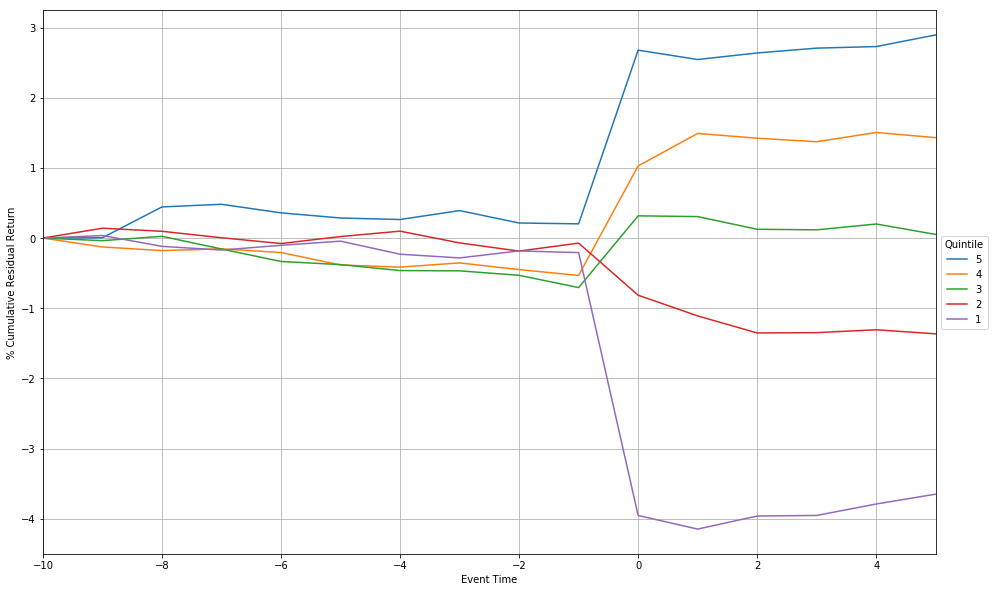

In [29]:
plot_results(df2013)